The CIFAR-10 dataset is a widely used benchmark dataset in the field of computer vision and machine learning. It consists of 60,000 color images, each with a resolution of 32x32 pixels, divided into 10 classes. The dataset is further split into 50,000 training images and 10,000 testing images.

The 10 classes in the CIFAR-10 dataset are as follows:

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

# Training the model

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2

# Set random seed for reproducibility
np.random.seed(42)

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fit the model
batch_size = 64
epochs = 100

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint])


Epoch 1/100
781/781 [==============================] - ETA: 0s - loss: 1.6737 - accuracy: 0.3802
Epoch 1: val_accuracy improved from -inf to 0.53590, saving model to best_model.h5
781/781 [==============================] - 107s 136ms/step - loss: 1.6737 - accuracy: 0.3802 - val_loss: 1.2737 - val_accuracy: 0.5359
Epoch 2/100


C:\Users\bikra\.conda\envs\qwe\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


781/781 [==============================] - ETA: 0s - loss: 1.3315 - accuracy: 0.5199
Epoch 2: val_accuracy improved from 0.53590 to 0.59040, saving model to best_model.h5
781/781 [==============================] - 105s 134ms/step - loss: 1.3315 - accuracy: 0.5199 - val_loss: 1.1395 - val_accuracy: 0.5904
Epoch 3/100
781/781 [==============================] - ETA: 0s - loss: 1.1900 - accuracy: 0.5756
Epoch 3: val_accuracy improved from 0.59040 to 0.64810, saving model to best_model.h5
781/781 [==============================] - 108s 138ms/step - loss: 1.1900 - accuracy: 0.5756 - val_loss: 0.9895 - val_accuracy: 0.6481
Epoch 4/100
781/781 [==============================] - ETA: 0s - loss: 1.0934 - accuracy: 0.6116
Epoch 4: val_accuracy improved from 0.64810 to 0.65640, saving model to best_model.h5
781/781 [==============================] - 113s 144ms/step - loss: 1.0934 - accuracy: 0.6116 - val_loss: 0.9836 - val_accuracy: 0.6564
Epoch 5/100
781/781 [==============================] - ETA

781/781 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.7501
Epoch 29: val_accuracy did not improve from 0.79060
781/781 [==============================] - 106s 135ms/step - loss: 0.7221 - accuracy: 0.7501 - val_loss: 0.6979 - val_accuracy: 0.7620
Epoch 30/100
781/781 [==============================] - ETA: 0s - loss: 0.7219 - accuracy: 0.7497
Epoch 30: val_accuracy did not improve from 0.79060
781/781 [==============================] - 106s 136ms/step - loss: 0.7219 - accuracy: 0.7497 - val_loss: 0.6221 - val_accuracy: 0.7866
Epoch 31/100
781/781 [==============================] - ETA: 0s - loss: 0.7179 - accuracy: 0.7494
Epoch 31: val_accuracy did not improve from 0.79060
781/781 [==============================] - 106s 136ms/step - loss: 0.7179 - accuracy: 0.7494 - val_loss: 0.6553 - val_accuracy: 0.7777
Epoch 32/100
781/781 [==============================] - ETA: 0s - loss: 0.7149 - accuracy: 0.7517
Epoch 32: val_accuracy improved from 0.79060 to 0.79210, sav

781/781 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.7668
Epoch 57: val_accuracy did not improve from 0.81790
781/781 [==============================] - 127s 163ms/step - loss: 0.6692 - accuracy: 0.7668 - val_loss: 0.5928 - val_accuracy: 0.8042
Epoch 58/100
781/781 [==============================] - ETA: 0s - loss: 0.6615 - accuracy: 0.7691
Epoch 58: val_accuracy did not improve from 0.81790
781/781 [==============================] - 125s 160ms/step - loss: 0.6615 - accuracy: 0.7691 - val_loss: 0.6120 - val_accuracy: 0.7955
Epoch 59/100
781/781 [==============================] - ETA: 0s - loss: 0.6593 - accuracy: 0.7710
Epoch 59: val_accuracy did not improve from 0.81790
781/781 [==============================] - 129s 166ms/step - loss: 0.6593 - accuracy: 0.7710 - val_loss: 0.5830 - val_accuracy: 0.8043
Epoch 60/100
781/781 [==============================] - ETA: 0s - loss: 0.6571 - accuracy: 0.7715
Epoch 60: val_accuracy did not improve from 0.81790
781/781 

OSError: No file or directory found at best_model.keras

# Evaluating the model on test data

In [7]:
# Load the best model
model = load_model('best_model.h5')

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Generate predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report and confusion matrix
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))


313/313 [==============================] - 5s 16ms/step - loss: 0.5596 - accuracy: 0.8179
Test loss: 0.5596264600753784
Test accuracy: 0.8179000020027161
313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.83      1000
           1       0.87      0.95      0.91      1000
           2       0.79      0.72      0.76      1000
           3       0.79      0.55      0.65      1000
           4       0.78      0.79      0.79      1000
           5       0.81      0.72      0.76      1000
           6       0.76      0.91      0.83      1000
           7       0.80      0.90      0.84      1000
           8       0.92      0.86      0.89      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000

[[891  16  11   7  12   0   6  

# Visualizing training and validation history

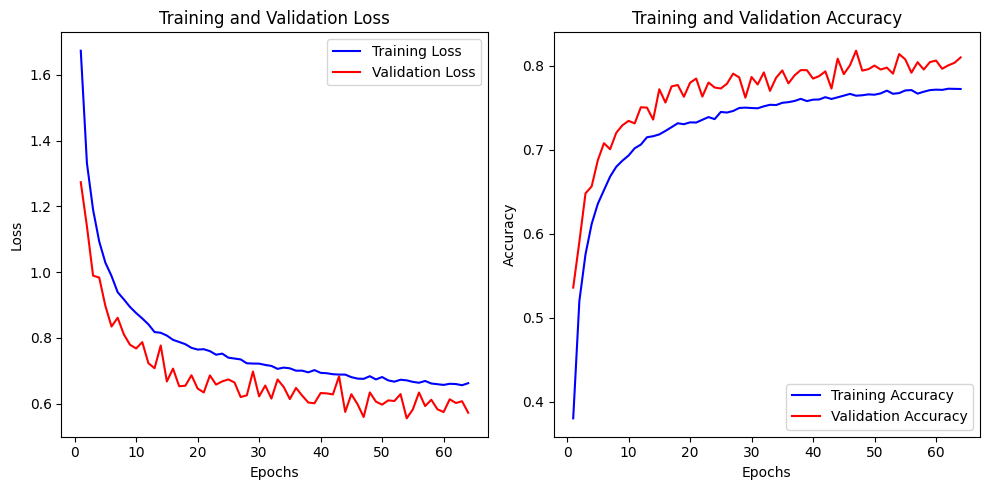

In [18]:
import matplotlib.pyplot as plt

# Access the metrics from the training history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation history
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Testing model on unseen data1

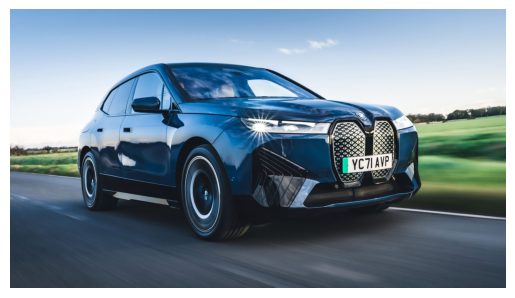

In [49]:
#Viewing test image1 
import cv2

# Load the image
image_path = r"D:\PC-python\F-projects\Transfer learning\6_0.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()


In [50]:
#Prediction using trained model

image_width = 32
image_height = 32

# Define the CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load and preprocess the new image
image_path = r"D:\PC-python\F-projects\Transfer learning\6_0.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (32, 32))  # Resize the image to match the input shape of the model
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = image.astype('float32') / 255  # Normalize the image data

# Expand dimensions to match the model's input shape
image = np.expand_dims(image, axis=0)

# Make predictions on the new image
predictions = model.predict(image)

# Convert predictions to class labels
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class
print(predicted_class_name)


1/1 [==============================] - 0s 16ms/step
Automobile


# Testing model on unseen data2

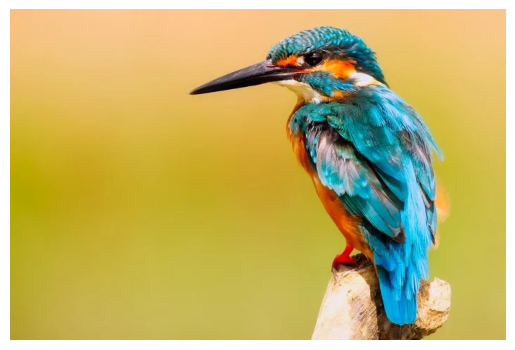

In [52]:
#Viewing test data 2 

# Load the image
image_path = r"D:\PC-python\F-projects\Transfer learning\bird-photographers.webp"  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()


In [53]:
#prediction using model 

# Load and preprocess the new image
image_path = r"D:\PC-python\F-projects\Transfer learning\bird-photographers.webp"  # Replace with the path to your image
image = cv2.imread(image_path)
image = cv2.resize(image, (32, 32))  # Resize the image to match the input shape of the model
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = image.astype('float32') / 255  # Normalize the image data

# Expand dimensions to match the model's input shape
image = np.expand_dims(image, axis=0)

# Make predictions on the new image
predictions = model.predict(image)

# Convert predictions to class labels
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class
print(predicted_class_name)


1/1 [==============================] - 0s 20ms/step
Bird
